In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%run ../optimizer.py

### To iste, co sme uz robili, ale na povodnych datach, mozno viac stlpcov budu sposobit vacsiu presnost predikcie

In [24]:
class LogisticRegression:

    def __init__(self):
        self.coeff = None

    def fit(self, X_train, Y_train, x0=np.array([-2.28, 0, 0, 0, 0, 0]), method="DFP", optimal_step=False):
        def J(x):
            return np.sum([(1 - Y_train[i]) * x @ X_train[i,:] + np.log(1 + np.exp(-x @ X_train[i,:])) for i in range(Y_train.shape[0])])

        def dJ(x):
            return np.sum(np.array([(1 - Y_train[i]) * X_train[i,:] - (X_train[i,:] / (np.exp(x @ X_train[i,:]) + 1)) for i in range(Y_train.shape[0])]),axis=0)

        self.coeff = optimize(x0, J, dJ, method, optimal_step)[-1]

    def predict(self, X_test):
        #sigmoid with calculated coefficients
        assert self.coeff is not None, "Model should be fitted first"
        return 1 / (1 + np.exp(-(self.coeff @ X_test.T)))

    def accuracy(self, target, predicted):
        predicted = np.rint(predicted)
        
        correct = 0
        for i in range(target.shape[0]):
            if target[i] == predicted[i]:
                correct += 1
        return correct / target.shape[0]
        

### Import train/test data

In [25]:
df = pd.read_csv('heart.csv')
df['bias'] = 1

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bias
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,1


In [27]:
from sklearn.model_selection import train_test_split
y = df['target'].to_numpy()
X = df.drop(['target'], axis=1).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit, predict, accuracy

In [28]:
x_train.shape

(820, 14)

In [29]:
lr = LogisticRegression()
#skusala som davat ako startovaci bod rozne hodnoty, doslo k rovnakemu vysledku
lr.fit(x_train, y_train, np.ones(x_train.shape[1]))
predicted = lr.predict(x_test)

In [30]:
lr.accuracy(y_test, predicted)

0.7951219512195122

### Confusion Matrix

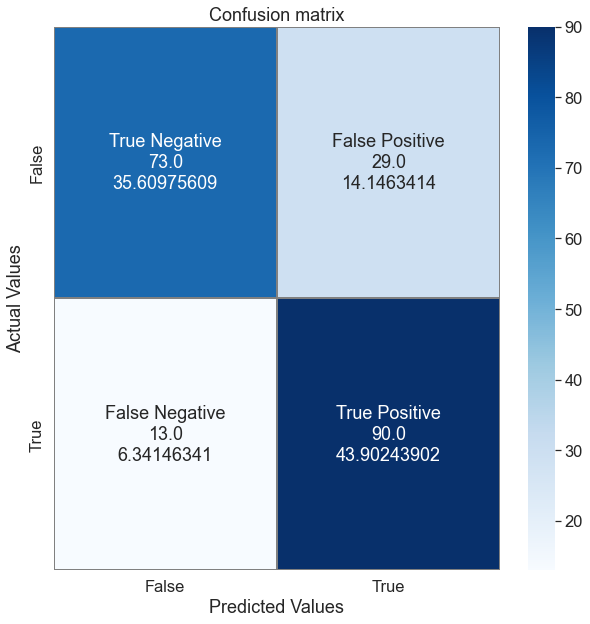

In [31]:
def confusion_matrix(test, predicted):
    rounded = np.rint(predicted)
    result = np.zeros((2, 2))

    for i in range(test.shape[0]):
        result[int(test[i])][int(rounded[i])] += 1

    labels = np.zeros((2, 2), dtype="U30")
    labels[0, 0] = f"True Negative\n{result[0, 0]}\n{100*result[0, 0]/result.sum()}%"
    labels[0, 1] = f"False Positive\n{result[0, 1]}\n{100*result[0, 1]/result.sum()}%"
    labels[1, 0] = f"False Negative\n{result[1, 0]}\n{100*result[1, 0]/result.sum()}%"
    labels[1, 1] = f"True Positive\n{result[1, 1]}\n{100*result[1, 1]/result.sum()}%"

    plt.subplots(figsize=(10, 10))
    sns.set(font_scale=1.5)
    ax = sns.heatmap(result, annot=labels, fmt="", cmap='Blues', linecolor="gray", linewidths=0.2)
    ax.set_title("Confusion matrix")
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Actual Values")
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()
    
confusion_matrix(y_test, predicted)